# <center>Анализ вакансий на hh.ru</center>

## Оглавление

* [1 Исследование структуры данных](#1-Исследование-структуры-данных)  
    * [1.1 Чтение данных](#1.1-Чтение-данных)  
    * [1.2 Ознакомление с признаками](#1.2-Ознакомление-с-признаками)  
    * [1.3 Основная информация о таблице](#1.3-Основная-информация-о-таблице)  
    * [1.4 Количество пропущенных значений](#1.4-Количество-пропущенных-значений)  
    * [1.5 Статистическая информация о столбцах](#1.5-Статистическая-информация-о-столбцах)  

* [2 Преобразование данных](#2-Преобразование-данных)  
    * [2.1 Преобразование признака "Образование и ВУЗ"](#2.1-Преобразование-признака-"Образование-и-ВУЗ")  
    * [2.2 Преобразование признака "Пол, возраст"](#2.2-Преобразование-признака-"Пол,-возраст")  
    * [2.3 Преобразование признака "Опыт работы"](#2.3-Преобразование-признака-"Опыт-работы")  
    * [2.4 Преобразование признака "Город, переезд, командировки"](#2.4-Преобразование-признака-"Город,-переезд,-командировки")  
    * [2.5 Преобразование признаков "Занятость" и "График"](#2.5-Преобразование-признаков-"Занятость"-и-"График")  
    * [2.6 Преобразование признака "ЗП"](#2.6-Преобразование-признака-"ЗП")  

* [3 Исследование зависимостей в данных](#3-Исследование-зависимостей-в-данных)  
    * [3.1 Распределение возраста соискателей](#3.1-Распределение-возраста-соискателей)  
    * [3.2 Распределение опыта работы соискателей](#3.2-Распределение-опыта-работы-соискателей)  
    * [3.3 Распределение заработной платы соискателей](#3.3-Распределение-заработной-платы-соискателей)  
    * [3.4 Зависимость медианной желаемой заработной платы от уровня образования](#3.4-Зависимость-медианной-желаемой-заработной-платы-от-уровня-образования")  
    * [3.5 Распределение желаемой заработной платы в зависимости от города](#3.5-Распределение-желаемой-заработной-платы-в-зависимости-от-города)  
    * [3.6 Зависимость медианной зарплаты от готовности к переезду командировкам](#3.6-Зависимость-медианной-зарплаты-от-готовности-к-переезду-командировкам)  
    * [3.7 Зависимость медианной желаемой заработной платы от возраста и образования](#3.7-Зависимость-медианной-желаемой-заработной-платы-от-возраста-и-образования)  
    * [3.8 Зависимость опыта работы от возраста](#3.8-Зависимость-опыта-работы-от-возраста)  
    * [3.9 Зависимость желаемого уровня зарплаты от отопыта и возраста](#3.9-Зависимость-желаемого-уровня-зарплаты-от-отопыта-и-возраста)  
    * [3.10 Зависимость готовых к командировкам и переезду от города](#3.10-Зависимость-готовых-к-командировкам-и-переезду-от-города)  
    * [3.11 Распределение признаков](#3.11-Распределение-признаковв)  

* [4 Очистка данных](#4-Очистка-данных)  
    * [4.1 Поиск полных дубликатов](#4.1-Поиск-полных-дубликатов)  
    * [4.2 Определение количества пропусков](#4.2-Определение-количества-пропусков)  
    * [4.3 Обработка пропусков](#4.3-Обработка-пропусков)  
    * [4.4 Очистка выбросов в признаке зарплаты](#4.4-Очистка-выбросов-в-признаке-зарплаты)  
    * [4.5 Очистка выбросов в признаке опыта работы](#4.5-Очистка-выбросов-в-признаке-опыта-работы)  
    * [4.6 Очистка выбросов в признаке возраста](#4.6-Очистка-выбросов-в-признаке-возраста)  

К сожалению, оглавление внутри ноутбука не работают на GitHub. Необходимо либо скачать ноутбук, либо перейти по [ссылке](https://nbviewer.org/github/DS-Makovetskiy/DS/blob/main/Project_1_Analysis_of_vacancies_from_HeadHunter/Project_1_Analysis_of_vacancies_from_HeadHunter.ipynb).

[Ссылка на файл с данными](https://drive.google.com/file/d/1THIp46dbhZdP5csbIX6RJU7d_nk2OZBa/view?usp=sharing)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from data_preprocessing import get_educational
from data_preprocessing import get_age
from data_preprocessing import get_experience
from data_preprocessing import get_cities
from data_preprocessing import get_moving_status
from data_preprocessing import get_business_trip
from data_preprocessing import get_currency
from data_preprocessing import outliers_z_score

## 1 Исследование структуры данных

### 1.1 Чтение данных

Выполним чтение из файла и посмотрим размерность данных

In [2]:
hh_base = pd.read_csv('data\dst-3.0_16_1_hh_database.csv', sep=';')

print(f'Размерность таблицы: {hh_base.shape}')

Размерность таблицы: (44744, 12)


### 1.2 Ознакомление с признаками

Отобразим несколько первых и последних записей для ознакомления с данными

In [3]:
display(hh_base.head(3))

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано


### 1.3 Основная информация о таблице

In [4]:
display(hh_base.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

None

### 1.4 Количество пропущенных значений

In [5]:
hh_base.isna().sum()

Пол, возраст                         0
ЗП                                   0
Ищет работу на должность:            0
Город, переезд, командировки         0
Занятость                            0
График                               0
Опыт работы                        168
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Образование и ВУЗ                    0
Обновление резюме                    0
Авто                                 0
dtype: int64

### 1.5 Статистическая информация о столбцах

Посмотрим на количество уникальзых записей в признаке "Опыт работы" и на самую распространенную должность

In [6]:
display(hh_base.describe())

experience  = hh_base['Опыт работы'].nunique()
position    = hh_base['Ищет работу на должность:'].mode()[0]

print(f'Количество уникальных значений в столбце «Опыт работы»: {experience}')
print(f'Самая распространённая должность: {position}')

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


Количество уникальных значений в столбце «Опыт работы»: 44413
Самая распространённая должность: Системный администратор


[&#8679; к оглавлению](#Оглавление)

## 2 Преобразование данных

### 2.1 Преобразование признака "Образование и ВУЗ"

Начнем с признака **"Образование и ВУЗ"**. Его текущий формат это: **[Уровень образования] [год выпуска] [ВУЗ] [специальность] ...**

In [7]:
hh_base['Образование и ВУЗ'][0]

'Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота, Калининград судоводительский, Организация и безопасность движения'

Нас будет интересовать только уровень образования.

При помощью функции-преобразования создадим новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

In [8]:
hh_base['Образование'] = hh_base['Образование и ВУЗ'].apply(get_educational)

# удалим исходный признак
hh_base = hh_base.drop('Образование и ВУЗ', axis=1)

Посмотрим на количество соискателей со средним уровнем образования и удалим исходный признак.

In [9]:
education_level = hh_base[hh_base['Образование'] == 'Среднее'].shape[0]
print(f'{education_level} соискателей имеет средний уровень образования')

559 соискателей имеет средний уровень образования


### 2.2 Преобразование признака "Пол, возраст"

Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **[Пол] , [возраст] , [дата рождения]**.

In [10]:
hh_base['Пол, возраст'][0]

'Мужчина ,  39 лет , родился 27 ноября 1979'

Выделим параметры **"Пол"** и **"Возраст"** в отдельные признаки.
* Признак пола преобразуем в 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста преобразуем в число.

In [11]:
# извлечение пола
hh_base['Пол'] = hh_base['Пол, возраст'].apply(lambda value: 'М' if 'Мужчина' in value else 'Ж')

# извлечение возраста
hh_base['Возраст'] = hh_base['Пол, возраст'].apply(get_age)

# удалим исходный признак
hh_base = hh_base.drop('Пол, возраст', axis=1)

Посмотрим на количство женских резюме в данных и средний возраст соискателей

In [12]:
gender_female   = round(hh_base['Пол'].value_counts(normalize=True) * 100, 2)['Ж']
mean_age        = hh_base['Возраст'].mean().round(1)

print(f'{gender_female} % женских резюме представлено в данных')
print(f'Средний возраст соискателей: {mean_age} года')

19.07 % женских резюме представлено в данных
Средний возраст соискателей: 32.2 года


### 2.3 Преобразование признака "Опыт работы"

Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **[Опыт работы] [n лет] [m месяцев], [периоды работы в различных компаниях]…**.

In [13]:
hh_base['Опыт работы'][0]

'Опыт работы 16 лет 10 месяцев  Август 2010 — по настоящее время 8 лет 10 месяцев МАОУ "СОШ № 1 г.Немана" Системный администратор Обслуживание ПК,установка ПО, ремонт, периферийной техники, Интернет локальная сеть. Ведение Электронного журнала, сайта организации.  Август 2002 — Август  2010 8 лет 1 месяц ТС "ВЕСТЕР-ИНФО" Старший продавец, директор отдела Продажи компьютерной техники'

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Особенности данных в признаке "Опыт работы":
1. В признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
2. В признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
3. Нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
4. Опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…

В результате преобразования должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.

In [14]:
hh_base['Опыт работы (месяц)'] = hh_base['Опыт работы'].apply(get_experience)

# удалим исходный признак
hh_base = hh_base.drop('Опыт работы', axis=1)

Посмотрим на медианный опыт работы в месяцах

In [15]:
median_experience = round(hh_base['Опыт работы (месяц)'].median())

print(f'Медианный опыт работы (в месяцах) равен: {median_experience}')

Медианный опыт работы (в месяцах) равен: 100


### 2.4 Преобразование признака "Город, переезд, командировки"

Следующий на очереди признак **"Город, переезд, командировки"**. Информация в нем представлена в следующем виде: **[Город] , [(метро)] , [готовность к переезду] [(города для переезда)] , [готовность к командировкам]**.

In [16]:
hh_base['Город, переезд, командировки'][0]

'Советск (Калининградская область) , не готов к переезду , не готов к командировкам'

 В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:
* Признак **"Город"** должен содержать только 4 категории: **"Москва"**, **"Санкт-Петербург"** и **"город-миллионник"** (их список ниже), остальные обозначьте как **"другие"**.

    Список городов-миллионников:
    ```python
    million_cities = [
        'Новосибирск', 'Екатеринбург', 'Нижний Новгород', 
        'Казань', 'Челябинск','Омск', 'Самара', 
        'Ростов-на-Дону', 'Уфа', 'Красноярск', 
        'Пермь', 'Воронеж', 'Волгоград']
    ```
    
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: **True** или **False**. Возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: **True** или **False**. Возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще одна особенность - при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Будем считать, что такие соискатели не готовы к командировкам.

In [17]:
hh_base['Город']                        = hh_base['Город, переезд, командировки'].apply(get_cities)
hh_base['Готовность к переезду']        = hh_base['Город, переезд, командировки'].apply(get_moving_status)
hh_base['Готовность к командировкам']   = hh_base['Город, переезд, командировки'].apply(get_business_trip)

# удалим исходный признак
hh_base = hh_base.drop('Город, переезд, командировки', axis=1)

Посмотрим на процент соискателей, живущих в Санкт-Петербург и тех, кто готов и к переезду и к командировке

In [18]:
mask1       = hh_base['Город'] == 'Санкт-Петербург'
live_in_spb = round(hh_base[mask1].shape[0] / hh_base.shape[0] * 100)
print(f'{live_in_spb} % соискателей живут в Санкт-Петербурге')


mask2           = hh_base['Готовность к переезду']
mask3           = hh_base['Готовность к командировкам']
ready_to_travel = round(hh_base[(mask2) & (mask3)].shape[0] / hh_base.shape[0] * 100)
print(f'{ready_to_travel} % соискателей готовы одновременно и к переездам, и к командировкам')

11 % соискателей живут в Санкт-Петербурге
32 % соискателей готовы одновременно и к переездам, и к командировкам


### 2.5 Преобразование признаков "Занятость" и "График"

Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий:
* Желаемая занятость: полная занятость, частичная занятость, проектная работа, волонтерство, стажировка
* Желаемый график работы: полный день, сменный график, гибкий график, удаленная работа, вахтовый метод.

На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу.

Выполните преобразование **OneHotEncoding** для признаков **"Занятость"** и **"График"**.

In [19]:
employment_type = ['полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка']
work_schedule   = ['полный день', 'сменный график', 'гибкий график', 'удаленная работа', 'вахтовый метод']

# преобразование признака "Занятость"
for type in employment_type:
    hh_base[type] = hh_base['Занятость'].apply(lambda value: True if type in value else False)

# преобразование признака "График"
for schedule in work_schedule:
    hh_base[schedule] = hh_base['График'].apply(lambda value: True if schedule in value else False)

# удалим исходный признак
hh_base = hh_base.drop(['Занятость', 'График'], axis=1)

Посмотрим на количество людей ищущих проектную работу и волонтерство, а так же тех, кто рассматривает работу вахтовым методом и работу с гибким графиком

In [20]:
mask1       = hh_base['проектная работа']
mask2       = hh_base['волонтерство']
employment  = hh_base[(mask1) & (mask2)].shape[0]
print(f'{employment} людей ищут проектную работу и волонтёрство')

mask3       = hh_base['вахтовый метод']
mask4       = hh_base['гибкий график']
schedule    = hh_base[(mask3) & (mask4)].shape[0]
print(f'{schedule} людей хотят работать вахтовым методом и с гибким графиком')

436 людей ищут проектную работу и волонтёрство
2311 людей хотят работать вахтовым методом и с гибким графиком


### 2.6 Преобразование признака "ЗП"

Особенность признака в том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

In [21]:
hh_base['ЗП'][0]

'29000 руб.'

Необходимо привести заработную плату к единой валюте, например, в рублях.

При помощи ресурса MDF.RU была сделана выгрузка курсов валют за период с 29.12.2017 по 05.12.2019 и сохранена в файл **ExchangeRates.csv**.

Загрузим необходимые столбцы из этого файла:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).

Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.


Дату необходимого курса валют будем определять по признаку **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

Выполним следующие действия для преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты. Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию, результат занести в новый столбец "ЗП (руб)".

In [22]:
# импортируем базу курсов валют за необходимый период, загружая только необходимые признаки
exchange_rates = pd.read_csv('data\ExchangeRates.csv', usecols=['currency', 'date', 'proportion', 'close'])

# приводим признаки дат к единому формату - datetime
hh_base['Обновление резюме']    = pd.to_datetime(hh_base['Обновление резюме'], dayfirst=True).dt.date
exchange_rates['date']          = pd.to_datetime(exchange_rates['date'], format='%d/%m/%y').dt.date

# извлечению размера зарплаты и приведение к формату float
hh_base['Зарплата'] = hh_base['ЗП'].apply(lambda value: float(value.split(' ')[0]))

# извлечение вылюты
hh_base['Валюта']   = hh_base['ЗП'].apply(get_currency)


# присоединение таблицы курсов к базе вакансий
hh_base = hh_base.merge(
    exchange_rates,
    left_on     = ['Обновление резюме', 'Валюта'],
    right_on    = ['date', 'currency'],
    how         = 'left'
)

# заполняем пустые значения в признаках close и proportion на 1
hh_base['close']        = hh_base['close'].fillna(1)
hh_base['proportion']   = hh_base['proportion'].fillna(1)

# пересчет в рубли
hh_base['ЗП (руб)'] = hh_base['Зарплата'] * hh_base['close'] / hh_base['proportion']


# удалим временные признаки
hh_base = hh_base.drop(['ЗП', 'Зарплата', 'Валюта', 'currency', 'date', 'close', 'proportion'], axis=1)

Посмотрим на желаемую медианную зарплату среди соискателей

In [23]:
median_salary = round(hh_base['ЗП (руб)'].median() / 1000)

print(f'Желаемая медианная заработная плата соискателей равна {median_salary} тысяч руб.')

Желаемая медианная заработная плата соискателей равна 59 тысяч руб.


[&#8679; к оглавлению](#Оглавление)

## 3 Исследование зависимостей в данных

### 3.1 Распределение возраста соискателей

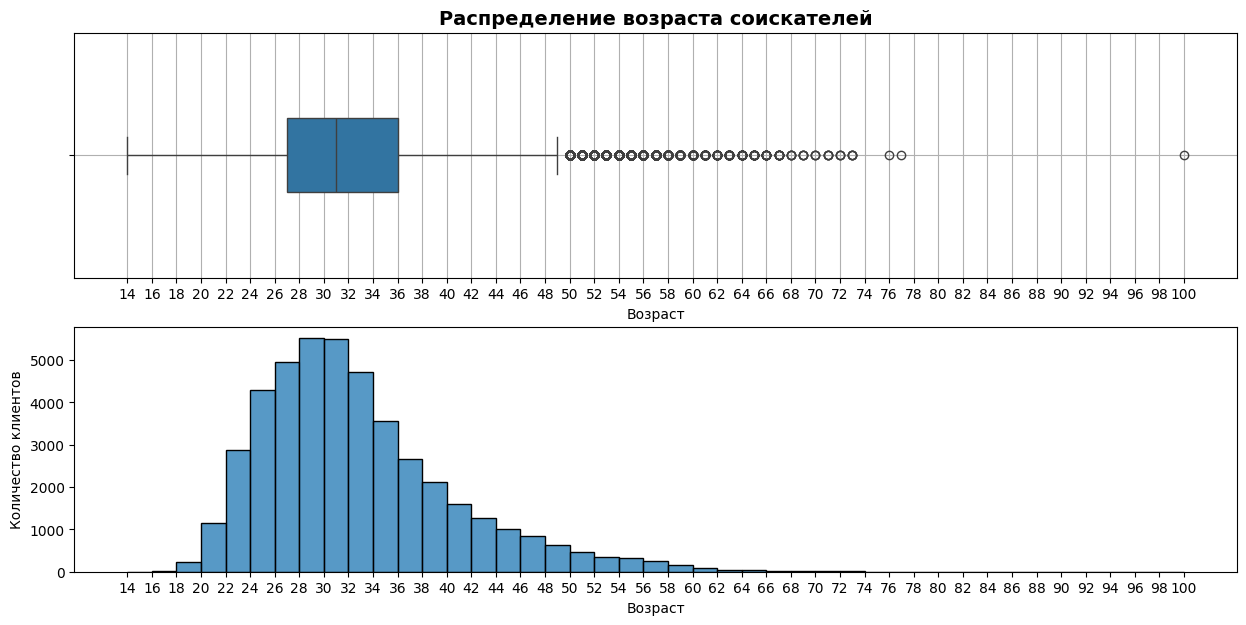

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 7))

sns.boxplot(
    data   = hh_base,
    x      = 'Возраст',
    orient = 'h',
    width  = 0.3,
    ax     = axes[0]
)
axes[0].set_title('Распределение возраста соискателей', fontweight='bold', fontsize=14)
axes[0].set_xlabel('Возраст');
axes[0].set_xticks(np.arange(14, hh_base['Возраст'].max()+1, 2))
axes[0].set_ylabel('')
axes[0].grid()

sns.histplot(
    data = hh_base,
    x    = 'Возраст',
    bins = 43,
    ax   = axes[1]
)
axes[1].set_xlabel('Возраст')
axes[1].set_xticks(np.arange(14, hh_base['Возраст'].max()+1, 2))
axes[1].set_ylabel('Количество клиентов');

In [25]:
age_mode = hh_base['Возраст'].mode()[0]
age_min  = hh_base['Возраст'].min()
age_max  = hh_base['Возраст'].max()

print(f'Модальное значение возраста: {age_mode}')
print(f'Предельные значения: {age_min} и {age_max}')

# аномалии
display(hh_base[(hh_base['Возраст'] == 14) + (hh_base['Возраст'] == 100)])

Модальное значение возраста: 30
Предельные значения: 14 и 100


,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,частичная занятость,проектная работа,волонтерство,стажировка,полный день,сменный график,гибкий график,удаленная работа,вахтовый метод,ЗП (руб)
29098,Ведущий инженер-программист,"КБ Аметист, Концерн АГАТ",Ведущий инженер-программист,2019-04-26,Не указано,Высшее,М,14,477.0,Москва,...,False,False,False,False,True,False,False,False,False,60000.0
33654,Frontend-разработчик,Freelance,Frontend-разработчик,2019-04-19,Не указано,Среднее специальное,М,100,30.0,Санкт-Петербург,...,True,True,False,True,True,False,True,True,False,60000.0


* Модальное значение возраста соискателей равняется 30-ти годам.
* Предельные значения возраста - 14 и 100 лет. Большинство соискателей сосредоточены в возрасте, примерно от 20 до 46 лет.
* В данный присутствуют как минимум две ярко выраженные аномалии:
    1. Соискатель 14-ти летнего возраста на должности "Ведущего инженера-программиста" с опытом работы более 39 лет, просто не может существовать в реальности.
    2. Так же очень странно выглядит 100 летний соискатель с опытом работы всего в два с половиной года, что так же, объективно невозможно.

Большинство соискателей размещают резюме в возрасте около 30 лет, по всей видимости к этому возрасту молодые соискатели набираются опыта и решают сменить работу на более интересную. Так же из графика видно, что чем выше возраст соискателя, от 40-а лет и более, тем реже они размещают резюме для поиска работы. Это говорит о том, что они могут быть удовлетворены текущим местом работы, в виду повышения в должности или же перехода на другие должности внутри компании.

### 3.2 Распределение опыта работы соискателей

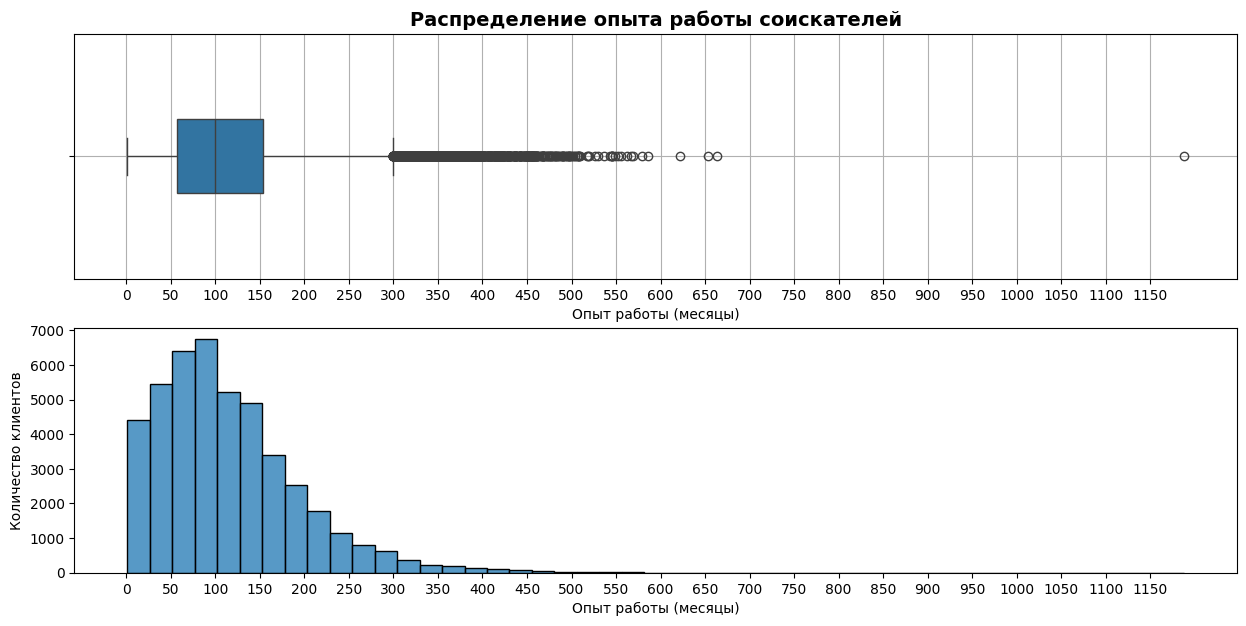

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 7))

sns.boxplot(
    data   = hh_base,
    x      = 'Опыт работы (месяц)',
    orient = 'h',
    width  = 0.3,
    ax     = axes[0]
)
axes[0].set_title('Распределение опыта работы соискателей', fontweight='bold', fontsize=14)
axes[0].set_xlabel('Опыт работы (месяцы)');
axes[0].set_xticks(np.arange(0, hh_base['Опыт работы (месяц)'].max()+1, 50))
axes[0].set_ylabel('')
axes[0].grid()

sns.histplot(
    data = hh_base,
    x    = 'Опыт работы (месяц)',
    bins = 47,
    ax   = axes[1]
)
axes[1].set_xlabel('Опыт работы (месяцы)')
axes[1].set_xticks(np.arange(0, hh_base['Опыт работы (месяц)'].max()+1, 50))
axes[1].set_ylabel('Количество клиентов');

In [27]:
experience_mode = round(hh_base['Опыт работы (месяц)'].mode()[0])
experience_min  = round(hh_base['Опыт работы (месяц)'].min())
experience_max  = round(hh_base['Опыт работы (месяц)'].max())

print(f'Модальное значение опыта: {experience_mode}')
print(f'Предельные значения: {experience_min} и {experience_max}')

# аномалии, посмотрим на количество соискателей с опытом более 50 лет
display(hh_base[hh_base['Опыт работы (месяц)'] > 600].sort_values(by='Опыт работы (месяц)'))

Модальное значение опыта: 81
Предельные значения: 1 и 1188


,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,частичная занятость,проектная работа,волонтерство,стажировка,полный день,сменный график,гибкий график,удаленная работа,вахтовый метод,ЗП (руб)
44363,Эксперт (специалист) по информационной безопас...,"ООО ""КАБЕСТ"", Группа компаний ""Астерос""","Директор департамента, Руководитель службы Гла...",2019-04-26,Не указано,Высшее,М,70,622.0,Москва,...,False,False,False,False,True,False,False,False,False,350000.0
10044,Инженер слаботочных систем электрик,"ТЭК СПб, ГУП",Инженер,2019-04-20,Имеется собственный автомобиль,Высшее,М,71,653.0,Санкт-Петербург,...,True,False,False,False,True,False,False,False,False,40000.0
3293,Руководитель проектов,430 военное представительство МО РФ,Специалист первой категории,2019-04-26,Имеется собственный автомобиль,Высшее,М,73,663.0,Москва,...,False,False,False,False,True,False,False,False,False,50000.0
40015,Системный администратор Windows,АО ТК Горизонт,Начальник отдела информационных технологий,2019-04-16,Не указано,Высшее,М,48,1188.0,город-миллионник,...,True,False,False,False,True,False,True,True,True,60000.0


* Модальное значение опыта работы соискателей равняется 81-му году.
* Опыт работы распределен от 1 до 1188 месяцев. Большинство соискателей имеют опыт работы примерно от 0 до 17 лет (от 1 до 200 месяцев).
* Аномальным значением можно считать опыт работы в 99 лет (1188 месяцев), что само по себе очень нетипично, так ещё и при возрасте в 48 лет, фактически невозможно.

На графике хорошо видно, что в первые 10-12 лет работы, соискатели в значительно большем количестве размещают резюме о поиске работы, что примерно соответствует активному поиску более выгодного места работы до 30 лет. Затем наблюдается достаточно быстрый спад количества размещенных резюме с увеличением опыта соискателя. Это может говорить о том, что более опытные и состоявшиеся сотрудники не желают менять место работы.

### 3.3 Распределение заработной платы соискателей

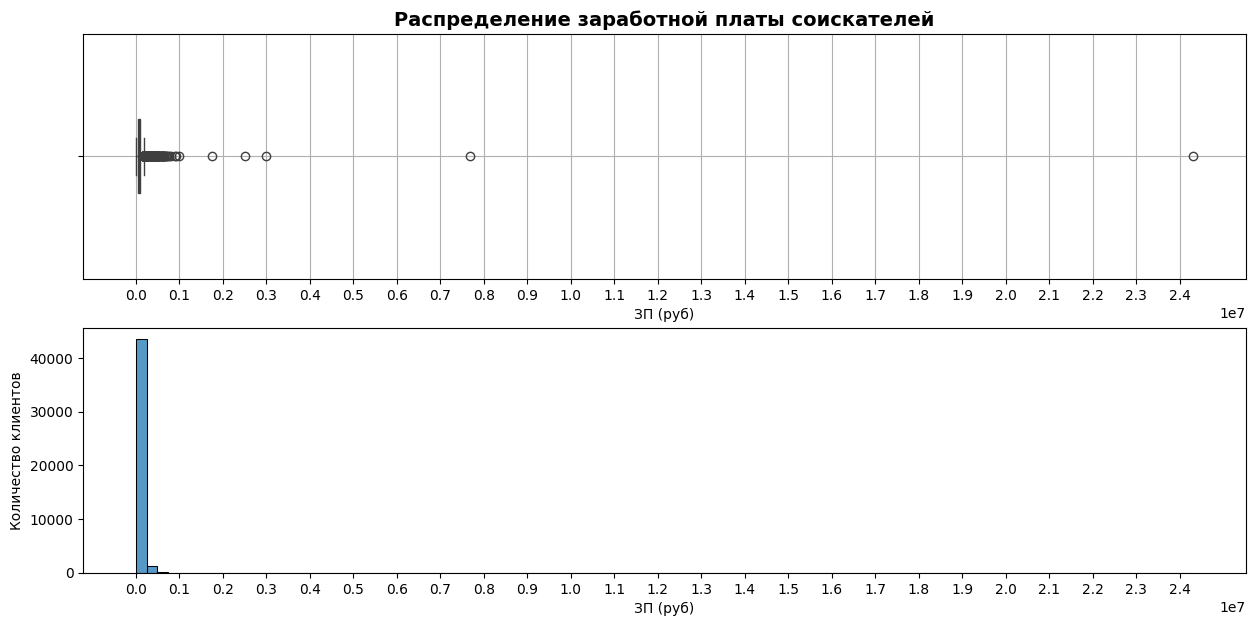

In [28]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 7))

sns.boxplot(
    data   = hh_base,
    x      = 'ЗП (руб)',
    orient = 'h',
    width  = 0.3,
    ax     = axes[0]
)
axes[0].set_title('Распределение заработной платы соискателей', fontweight='bold', fontsize=14)
axes[0].set_xlabel('ЗП (руб)');
axes[0].set_xticks(np.arange(0, hh_base['ЗП (руб)'].max()+1, 1e6))
axes[0].set_ylabel('')
axes[0].grid()

sns.histplot(
    data = hh_base,
    x    = 'ЗП (руб)',
    bins = 100,
    ax   = axes[1]
)
axes[1].set_xlabel('ЗП (руб)')
axes[1].set_xticks(np.arange(0, hh_base['ЗП (руб)'].max()+1, 1e6))
axes[1].set_ylabel('Количество клиентов');

In [29]:
salary_mode = round(hh_base['ЗП (руб)'].mode()[0])
salary_min  = round(hh_base['ЗП (руб)'].min())
salary_max  = round(hh_base['ЗП (руб)'].max())

print(f'Модальное значение зарплаты: {salary_mode}')
print(f'Предельные значения: {salary_min} и {salary_max}')

# отфильтрованые данные, с зарплатой до 1 млн. рублей
hh_to_a_million = hh_base[hh_base['ЗП (руб)'] < 1e6]

# аномалии, количество минимальных зарплат
min_salary       = hh_base['ЗП (руб)'].min()
min_salary_count = hh_base[mask1 & mask2 & mask3]['ЗП (руб)'].count()
print(f'Минимальная зарплата размером: {round(min_salary)} руб., встречается {min_salary_count} раз')

Модальное значение зарплаты: 50000
Предельные значения: 1 и 24304876
Минимальная зарплата размером: 1 руб., встречается 227 раз


Желаемые зарплаты, более 1 млн. рублей

In [30]:
over_a_million = hh_base[hh_base['ЗП (руб)'] > 1e6]

print(f'Количество желаемых зарплат, больше 1 млн. рублей: {over_a_million.shape[0]}')

display(over_a_million.sort_values(by='ЗП (руб)'))

Количество желаемых зарплат, больше 1 млн. рублей: 5


,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,частичная занятость,проектная работа,волонтерство,стажировка,полный день,сменный график,гибкий график,удаленная работа,вахтовый метод,ЗП (руб)
41924,Project manager,Тинькофф Банк,Технолог автоматизации бизнес-процессов,2019-04-22,Не указано,Неоконченное высшее,М,24,39.0,Москва,...,True,True,False,False,True,False,True,True,False,1750000.0
43134,Chief AI Officer,Finnish Russian Univeristy Cooperation in Tele...,Project Manager in Multimedia Technologies,2018-10-25,Не указано,Высшее,М,38,97.0,Москва,...,False,False,False,False,True,False,False,False,False,2500000.0
28253,"Руководитель IT проектов, Роботизация, Автомат...",HAMSTER ROBOTICS,Заместитель директора,2019-04-27,Имеется собственный автомобиль,Высшее,М,39,280.0,Москва,...,True,True,False,False,True,False,True,True,True,3000000.0
39191,Специалист по IT,"ТОО ""AMS""",Системный администратор,2019-04-22,Не указано,Среднее специальное,М,29,98.0,другие,...,False,False,False,False,True,False,False,False,False,7675224.0
6931,"Программирование, Разработка или Системный адм...","Евразийский банк, АО",Главный специалист Отдел разработки систем роз...,2019-04-22,Не указано,Высшее,М,31,115.0,другие,...,True,True,False,False,True,True,True,True,False,24304876.0


Количество соискателей, рассматривающих зарплату менее 1000 руб. при рабочем графике на "полный день"

In [31]:
mask1 = hh_base['ЗП (руб)'] < 1000
mask2 = hh_base['полный день']
mask3 = hh_base['ЗП (руб)'] == hh_base['ЗП (руб)'].min()

display(hh_base[mask1 & mask2].sort_values(by='ЗП (руб)'))

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,частичная занятость,проектная работа,волонтерство,стажировка,полный день,сменный график,гибкий график,удаленная работа,вахтовый метод,ЗП (руб)
20964,Директор по продажам /Руководитель отдела продаж,Марвел,начальник отдела Huawei Enterprise,2019-04-25,Не указано,Высшее,М,36,166.0,Москва,...,False,False,False,False,True,False,False,False,False,1.0
28353,Системный администратор/стажёр,"ООО ""Ориджинал Бутик""",Администратор сайта,2019-04-26,Не указано,Неоконченное высшее,М,27,83.0,другие,...,False,False,False,True,True,False,True,False,False,1.0
17954,Менеджер проектов,Free,Свободный художник,2019-04-12,Не указано,Высшее,М,43,236.0,Москва,...,True,True,False,True,True,True,True,True,True,1.0
6991,Контент-менеджер,"ООО ""Ориджинал Бутик""",Администратор сайта,2019-04-22,Не указано,Неоконченное высшее,М,27,83.0,другие,...,True,False,False,False,True,False,True,True,False,1.0
16521,SEO-оптимизатор,"АН ""Счастливый дом""",SEO-оптимизатор,2019-04-25,Не указано,Высшее,М,20,15.0,другие,...,True,True,False,True,True,True,True,True,False,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32212,Региональный менеджер по продажам,"Общество с ограниченной ответственностью ""Б-СТ...",Директор,2019-05-14,Не указано,Высшее,М,55,299.0,другие,...,False,False,False,False,True,True,False,False,False,700.0
27984,Специалист по работе с клиентами IT,"ЗАО ""СБМ-групп""",Специалист по работе с клиентами,2019-04-26,Не указано,Высшее,Ж,30,120.0,другие,...,True,False,False,False,True,True,True,False,False,700.0
6526,Автор текстов,МГККВД,Врач-бактериолог,2019-04-22,Имеется собственный автомобиль,Высшее,Ж,34,26.0,другие,...,True,False,False,False,True,False,False,True,False,700.0
44107,Web-разработчик,Интернет зона,"Web-мастер, программист РНР, HTML, MySQL, CSS,...",2019-04-09,Не указано,Высшее,М,29,132.0,Москва,...,True,True,False,False,True,True,True,True,False,700.0


* Модальное значение заработной платы составляет 50000 рублей.
* Разброс желаемой заработной платы находится в диапазоне от 1 до 24 304 876 руб. Большинство соискателей рассчитывают на зарплату в размере от 20 000 до 100 000 рублей.
* Странных значений достаточно много:
    1. Всего один человек, указавший желаемую зарплату более 24 млн. руб. Что крайне сильно выбивается из общего распределения. К тому же сумма указана как 24 304 876, обычно соискатели указывают более ровные, круглые суммы. Это похоже на ошибку ввода.
    2. Соискатель, планирующий устроиться на должность - "Специалист по IT", со среднем специальным образованием, желает зарплату более 7 млн. руб. Это кажется странным само по себе, но к тому же сумма указана как - 7 675 224, хотя обычно большинство соискателей указывают более ровные, круглые суммы. Это так же похоже на ошибку.
    3. Достаточно странным выглядят 72 соискателя, рассматривающих зарплату менее 1 000 руб., при условии, что они готовы работать полный рабочий день. При этом 12 человек указали в качестве желаемой зарплаты всего 1 руб.

Построим дополнительный график, не включающий желаемую заработную плату более 1 млн. рублей. Данный график нужен для оценки интервала желаемой зарплаты большинства соискателей

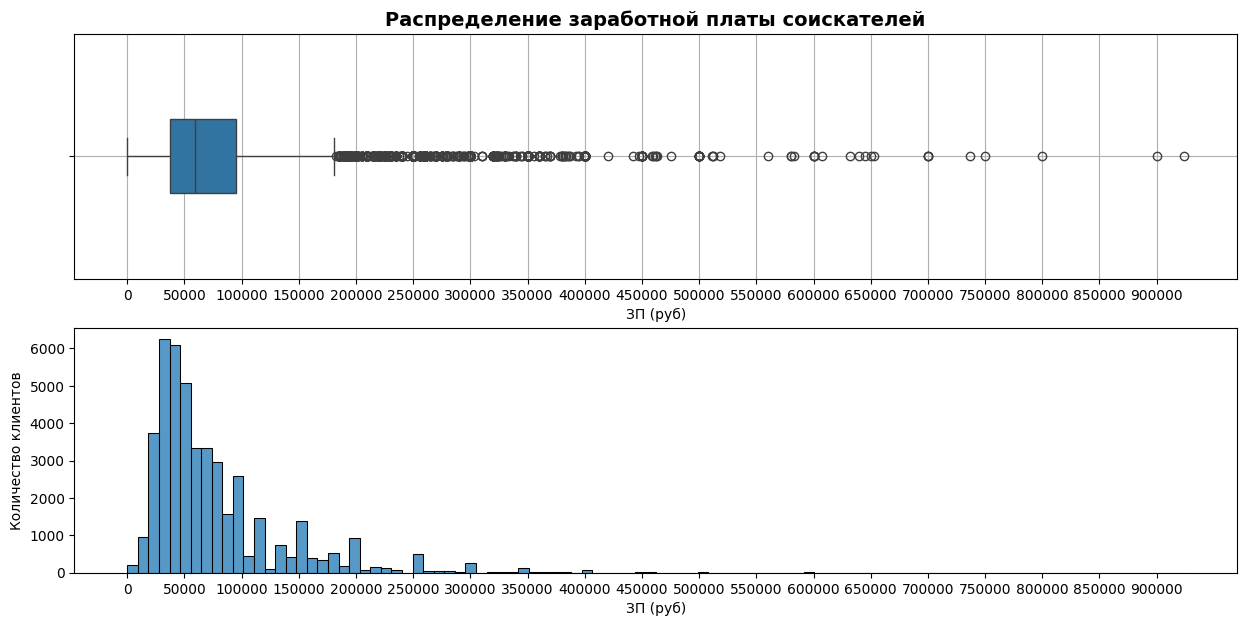

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 7))

sns.boxplot(
    data   = hh_to_a_million,
    x      = 'ЗП (руб)',
    orient = 'h',
    width  = 0.3,
    ax     = axes[0]
)
axes[0].set_title('Распределение заработной платы соискателей', fontweight='bold', fontsize=14)
axes[0].set_xlabel('ЗП (руб)');
axes[0].set_xticks(np.arange(0, hh_to_a_million['ЗП (руб)'].max()+1, 50000))
axes[0].set_ylabel('')
axes[0].grid()

sns.histplot(
    data = hh_to_a_million,
    x    = 'ЗП (руб)',
    bins = 100,
    ax   = axes[1]
)
axes[1].set_xlabel('ЗП (руб)')
axes[1].set_xticks(np.arange(0, hh_to_a_million['ЗП (руб)'].max()+1, 50000))
axes[1].set_ylabel('Количество клиентов');

Если исключить из графика аномалии, становится видно, что большинство соискателей рассчитывают на зарплату до 50 тыс рублей, чуть меньшее количество людей ищут зарплату до 100 тыс рублей. В диапазоне от 100 тыс. и более есть всего пара всплесков на 150 и 200 тыс., на остальные же размеры окладов рассчитывают немногие соискатели. Это может говорить о невысоком уровне зарплат в стране и о том, что на более высокие зарплаты рассчитывают специалисты более высокой квалификации, в более профильных направлениях деятельности.

### 3.4 Зависимость медианной желаемой заработной платы от уровня образования

Построим диаграмму, которая показывает зависимость **медианной** желаемой заработной платы **"ЗП (руб)"** от уровня образования **"Образование"**, на основе данных о резюме, где желаемая заработная плата меньше 1 млн рублей.

In [33]:
median_salary = hh_to_a_million.groupby('Образование')['ЗП (руб)'].median().reset_index()

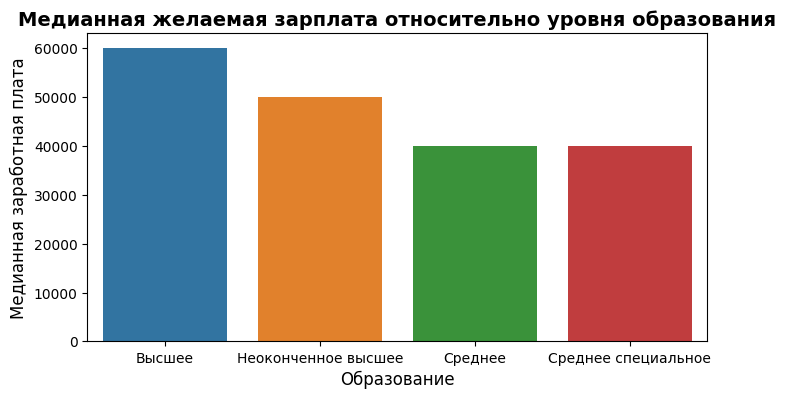

In [34]:
fig = plt.figure(figsize=(8, 4))

barplot = sns.barplot(
    data = median_salary,
    x    = 'Образование',
    y    = 'ЗП (руб)',
    hue  = 'Образование'
)
barplot.set_title('Медианная желаемая зарплата относительно уровня образования', fontweight='bold', fontsize=14)
barplot.set_xlabel(barplot.get_xlabel(), fontsize=12)
barplot.set_ylabel('Медианная заработная плата', fontsize=12)
barplot.set_xticks(barplot.get_xticks())
barplot.set_xticklabels(barplot.get_xticklabels());

* Наибольший уровень желаемой зарплаты наблюдается у соискателей, получивших высшее образование, а наименьший уровень зарплаты ожидают люди со среднем и средне специальным образованием.
* Признак образования важен в анализе, так как разница между высшим и средними образованиями в медианном представлении, составляет примерно 33%.

В подтверждение предыдущему графику, данная диаграмма показывает более высокие ожидания к зарплате, у людей с высшим образованием и меньшие ожидания в заработной плате у соискателей со средним образованием.

### 3.5 Распределение желаемой заработной платы в зависимости от города

Построим диаграмму, которая показывает распределение желаемой заработной платы **"ЗП (руб)"** в зависимости от города **"Город"**. Используем данные о резюме, где желая заработная плата меньше 1 млн рублей.

In [35]:
cities = hh_to_a_million.sort_values(by='Город')

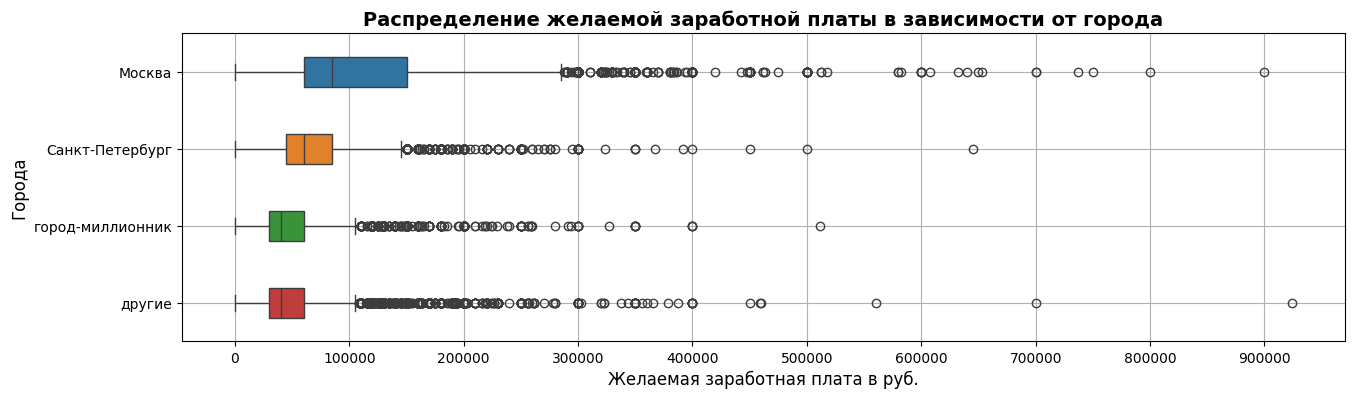

In [36]:
fig = plt.figure(figsize=(15, 4))

boxplot = sns.boxplot(
    data   = cities,
    x      = 'ЗП (руб)',
    y      = 'Город',
    hue    = 'Город',
    orient = 'h',
    width  = 0.4
)
boxplot.set_title('Распределение желаемой заработной платы в зависимости от города', fontweight='bold', fontsize=14)
boxplot.set_xlabel('Желаемая заработная плата в руб.', fontsize=12)
boxplot.set_xticks(np.arange(0, hh_to_a_million['ЗП (руб)'].max()+1, 100000))
boxplot.set_ylabel('Города', fontsize=12)
boxplot.grid();

* Присутствует хорошо выраженная зависимость желаемой зарплаты от размера города. Так, если в категории других городов и городов миллионников медианное значение с размахом равны между собой и не высоки, то с увеличением размера города, растет медианное значение и диапазон желаемых зарплат.
* Данный признак очень важен, так как дает понять в каких группах городов, на какие зарплаты рассчитывают соискатели.

Из графика хорошо заметна разница в ожидании зарплаты между жителями России в столице и регионах. Так, если в небольших или промышленных городах в основном нужны простые рабочие и работники сферы обслуживания, у которых заработная плата как правило невысока, то в столице, сосредоточены работники более высокой квалификации, ожидающих значительно более высокие зарплаты. Сюда могут входить как управляющие/регулирующие органы и должности, так и разработчики, инженеры, топ-менеджеры, работники сферы искусств и пр.

### 3.6 Зависимость медианной зарплаты от готовности к переезду командировкам

Построим многоуровневую столбчатую диаграмму, которая показывает зависимость медианной заработной платы **"ЗП (руб)"** от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**.

In [37]:
hh_travel = hh_base.groupby(['Готовность к переезду', 'Готовность к командировкам'])['ЗП (руб)'].median().reset_index()

hh_travel['Готовность к переезду']      = hh_travel['Готовность к переезду'].apply(lambda x: 'Готов к переезду' if x else 'Не готов к переезду')
hh_travel['Готовность к командировкам'] = hh_travel['Готовность к командировкам'].apply(lambda x: 'Готов к командировкам' if x else 'Не готов к командировкам')

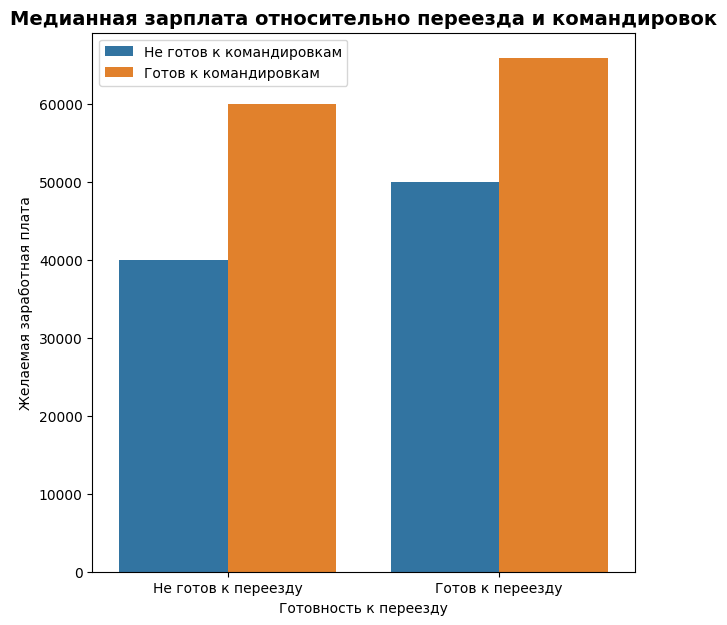

In [38]:
fig = plt.figure(figsize=(7, 7))
barplot = sns.barplot(
    data = hh_travel,
    y    = 'ЗП (руб)',
    x    = 'Готовность к переезду',
    hue  = 'Готовность к командировкам'
)
barplot.set_title('Медианная зарплата относительно переезда и командировок', fontweight='bold', fontsize=14)
barplot.set_xlabel(barplot.get_xlabel())
barplot.set_ylabel('Желаемая заработная плата');
barplot.legend(loc='upper left');

Из данного графика хорошо видно, что соискатели, не планирующие переезд и не готовые к командировкам, рассчитывают на относительно невысокую зарплату. В то время как готовые к переезду и командировкам ожидают значительно более высокую зарплату. 

Достаточно важным критерием является именно готовность к командировкам, при её наличии ожидание в зарплате выше, чем при прочих равных.

In [39]:
median_salary = round(hh_base[hh_base['Готовность к переезду'] & hh_base['Готовность к командировкам']]['ЗП (руб)'].median() / 1000)

print(f'Желаемая медианная заработная плата соискателей, готовых к переезду и командировкам равна: {median_salary}')

Желаемая медианная заработная плата соискателей, готовых к переезду и командировкам равна: 66


### 3.7 Зависимость медианной желаемой заработной платы от возраста и образования

Построим сводную таблицу, иллюстрирующую зависимость медианной желаемой заработной платы от возраста **"Возраст"** и образования **"Образование"**. На полученной сводной таблице построим тепловую карту.

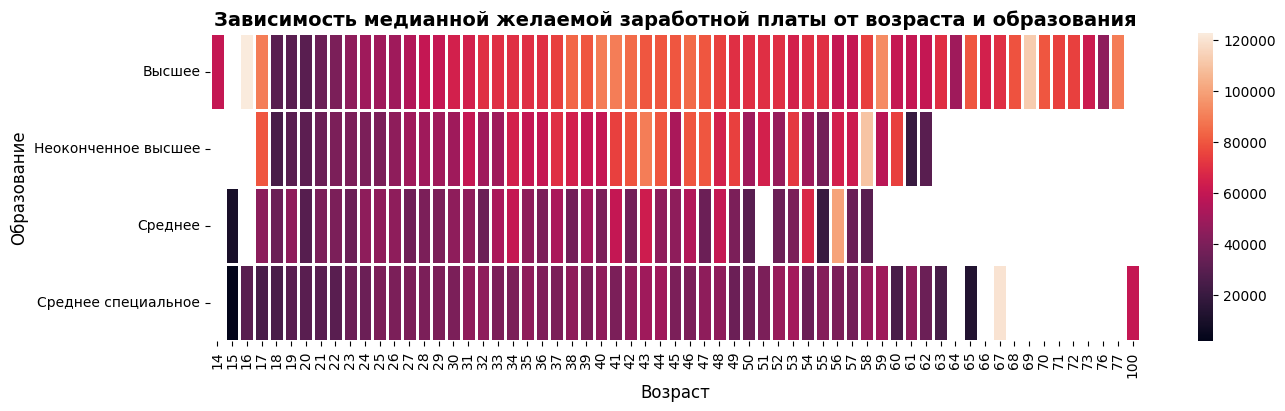

In [40]:
hh_heatmap = hh_base.pivot_table(
    values  = 'ЗП (руб)',
    index   = 'Образование',
    columns = 'Возраст',
    aggfunc = 'median'
)

fig = plt.figure(figsize=(15, 4))
heatmap = sns.heatmap(
    hh_heatmap,
    linewidth = 1,
    linecolor = 'w'
)
heatmap.set_title('Зависимость медианной желаемой заработной платы от возраста и образования', fontweight='bold', fontsize=14)
heatmap.set_xlabel(heatmap.get_xlabel(), fontsize=12)
heatmap.set_ylabel(heatmap.get_ylabel(), fontsize=12)
heatmap.set_yticklabels(heatmap.get_yticklabels());

На тепловой карте отчетливо прослеживается скорость карьерного роста в зависимости от уровня образования соискателей.

Уровень желаемой зарплаты у соискателей, имеющих среднее и средне специальное образование, с возрастом увеличивается незначительно, а в более преклонном возрасте начинает снижаться. При этом в раннем возрасте уровень зарплаты значительно ниже, по сравнению с другими группами, а также возраст поиска работы ограничивается приблизительно 58-ю и 65-ю годами для среднего и средне специального образования соответственно.

При неоконченном высшем образовании у соискателей наблюдается постепенное повышение зарплаты с пиком в возрасте от 41 до 49 лет и постепенным снижением.

Имея высшее образование соискатели с раннего возраста имеют возможность получить более высокооплачиваемую должность. Карьерный рост более стремительный (с пиком в возрасте от 37 до 49 лет) и более продолжительный по возрасту в сравнении с другими категориями. К тому же, имея высшее образование, соискатели продолжают искать работу с высокой ожидаемой зарплатой и в более преклонном возрасте.

### 3.8 Зависимость опыта работы от возраста

Построим диаграмму рассеяния, показывающую зависимость опыта работы **"Опыт работы (месяц)"** от возраста **"Возраст"**. Опыт работы переведем из месяцев в года, чтобы признаки были в едином масштабе.

Отобразим на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя).

In [41]:
month_to_year = hh_base['Опыт работы (месяц)'] / 12

Опыт работы больше, либо равный возрасту наблюдается у 7 соискателей


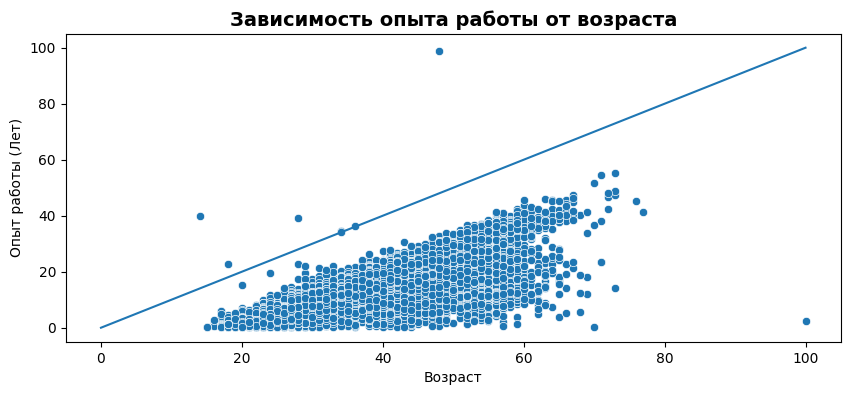

In [42]:
fig = plt.figure(figsize=(10, 4))

scatterplot = sns.scatterplot(
    data = hh_base,
    x    = 'Возраст',
    y    = month_to_year
)
sns.lineplot(x=[0, 100], y=[0, 100])
scatterplot.set_title('Зависимость опыта работы от возраста', fontweight='bold', fontsize=14)
scatterplot.set_xlabel(scatterplot.get_xlabel())
scatterplot.set_ylabel('Опыт работы (Лет)');

# аномалии
age_outliers = hh_base[month_to_year >= hh_base['Возраст']].shape[0]
print(f'Опыт работы больше, либо равный возрасту наблюдается у {age_outliers} соискателей')

На графике наглядно отражены выбросы, в которых опыт работы больше либо равен возрасту соискателя, что абсолютно невозможно.

### 3.9 Зависимость желаемого уровня зарплаты от отопыта и возраста

In [43]:
month_to_year = (hh_to_a_million['Опыт работы (месяц)'] / 12)

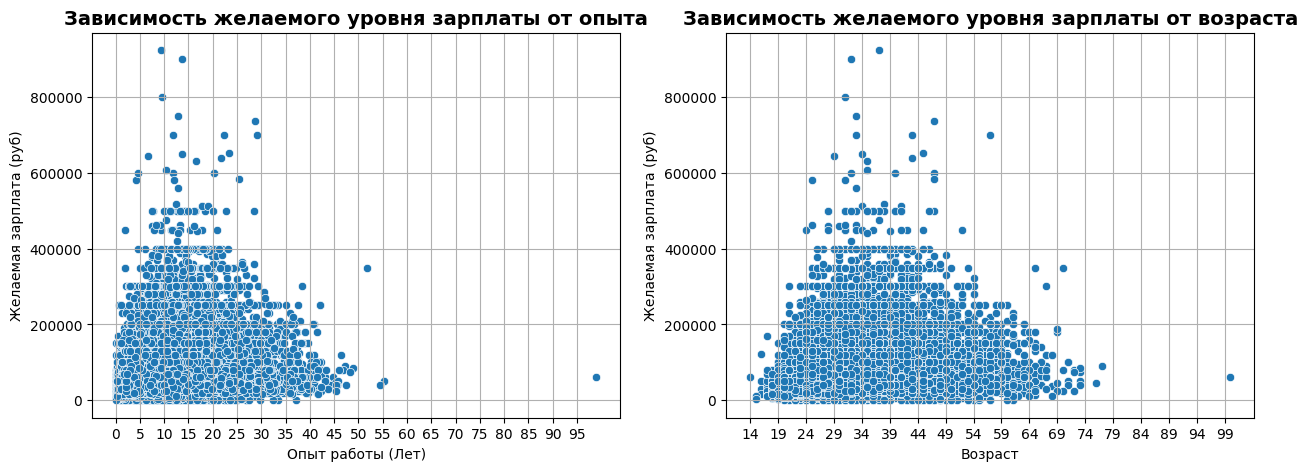

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.scatterplot(
    data = hh_to_a_million,
    x    = month_to_year,
    y    = 'ЗП (руб)',
    ax   = axes[0]
)
axes[0].set_title('Зависимость желаемого уровня зарплаты от опыта', fontweight='bold', fontsize=14)
axes[0].set_xlabel('Опыт работы (Лет)')
axes[0].set_xticks(np.arange(0, month_to_year.max()+1, 5))
axes[0].set_ylabel('Желаемая зарплата (руб)')
axes[0].grid();

sns.scatterplot(
    data = hh_to_a_million,
    x    = 'Возраст',
    y    = 'ЗП (руб)',
    ax   = axes[1]
)
axes[1].set_title('Зависимость желаемого уровня зарплаты от возраста', fontweight='bold', fontsize=14)
axes[1].set_xlabel('Возраст')
axes[1].set_xticks(np.arange(14, hh_to_a_million['Возраст'].max()+1, 5))
axes[1].set_ylabel('Желаемая зарплата (руб)')
axes[1].grid();

Из приведенного слева графика можно сделать вывод, что соискатели со стажем в диапазоне от 5 до 25 лет склонны рассчитывать на значительно более высокую заработную плату (400 тыс. и выше).

Это же подтверждает и правый график, где на более высокий оклад рассчитывают в возрасте от 25 до 45 лет.

### 3.10 Зависимость готовых к командировкам и переезду от города

In [45]:
# группировка готовых к командировкам по городам и переименование признаков для большего удобства
business_trip = hh_base[['Готовность к командировкам', 'Город']].value_counts().reset_index().sort_values(by='Город')
business_trip.columns = ['Готовность к командировкам', 'Группы городов', 'Количество соискателей']

# группировка готовых к переезду по городам и переименование признаков для большего удобства
relocation = hh_base[['Готовность к переезду', 'Город']].value_counts().reset_index().sort_values(by='Город')
relocation.columns = ['Готовность к переезду', 'Группы городов', 'Количество соискателей']

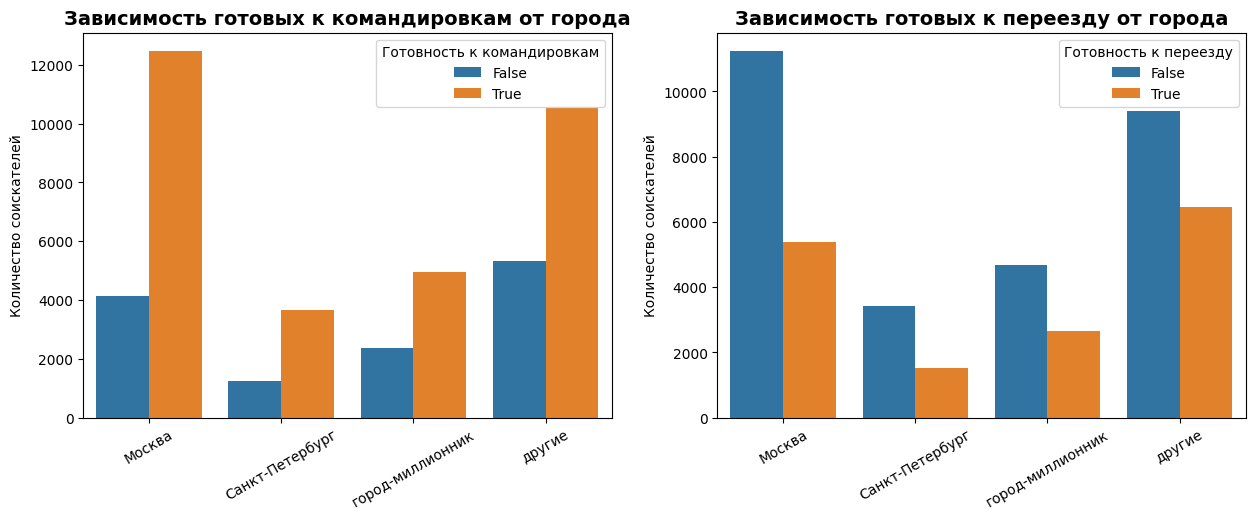

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.barplot(
    data = business_trip,
    x    = 'Группы городов',
    y    = 'Количество соискателей',
    hue  = 'Готовность к командировкам',
    ax   = axes[0]
)
axes[0].set_title('Зависимость готовых к командировкам от города', fontweight='bold', fontsize=14)
axes[0].set_xlabel('')
axes[0].set_xticks(axes[0].get_xticks())
axes[0].set_xticklabels(axes[0].get_xticklabels())
axes[0].xaxis.set_tick_params(rotation=30)
axes[0].set_ylabel(axes[0].get_ylabel())

sns.barplot(
    data = relocation,
    x    = 'Группы городов',
    y    = 'Количество соискателей',
    hue  = 'Готовность к переезду',
    ax   = axes[1]
)
axes[1].set_title('Зависимость готовых к переезду от города', fontweight='bold', fontsize=14)
axes[1].set_xlabel('')
axes[1].set_xticks(axes[1].get_xticks())
axes[1].set_xticklabels(axes[1].get_xticklabels())
axes[1].xaxis.set_tick_params(rotation=30)
axes[1].set_ylabel(axes[1].get_ylabel());

На левом графике хорошо видна готовность большего числа соискателей к командировкам в Москве и небольших городах, по сравнению с другими группами городов.
При этом в целом, в каждой группе городов, если рассматривать её отдельно, готовых к командировкам всегда почти вдвое больше, чем не готовых.

На правом графике отражено общее нежелание соискателей к переезду, особенно в Москве. При этом самое большое количество готовый к переезду находится в небольших городах.

### 3.11 Распределение признаков

In [47]:
table = hh_base.loc[:, 'Готовность к переезду':'вахтовый метод']

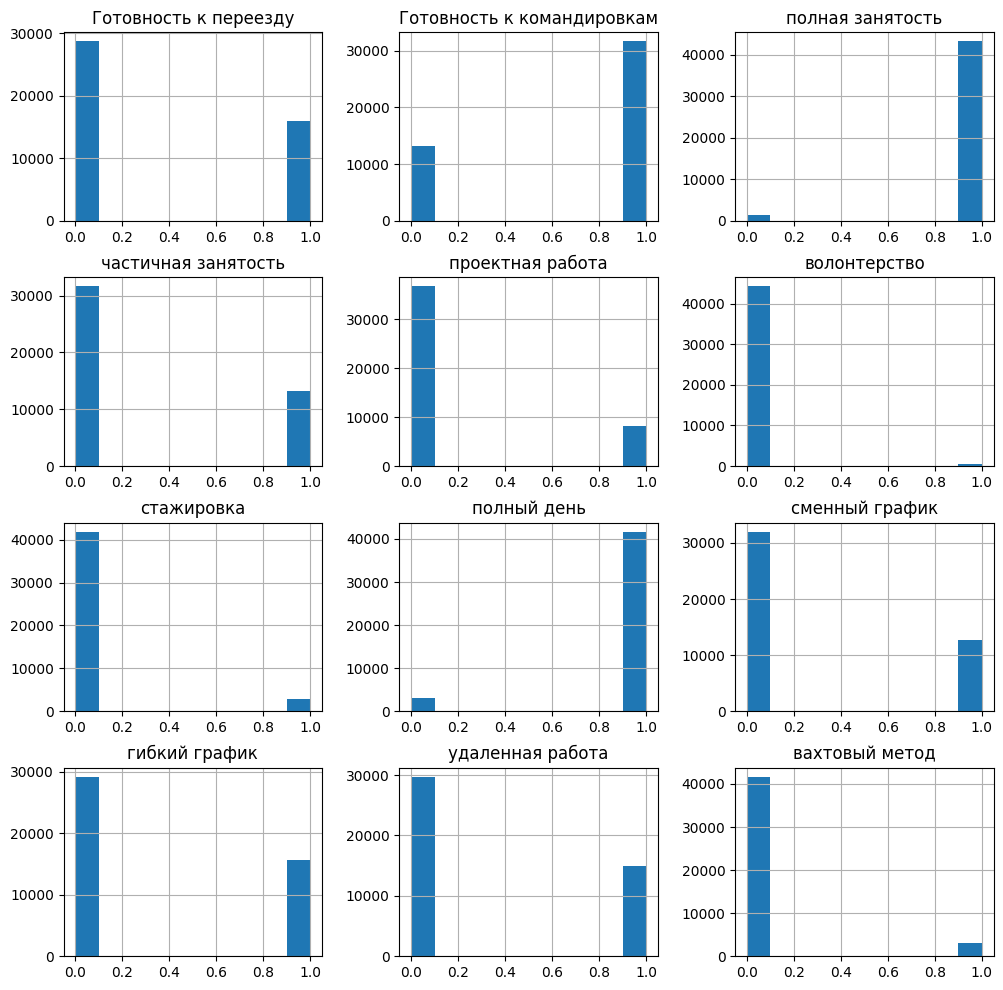

In [48]:
table.replace({True: 1, False: 0}).hist(figsize=(12, 12));

Из распределения признаков можно сделать вывод о том, что в целом соискатели:
1. Не склонны к переездам, но готовы на командировки.
2. Практически не рассматривают Проектную работу, Волонтерство, Стажировку и Вахтовый метод.
3. В меньшей степени готовы на Частичную занятость, Сменный/Гибкий график и Удаленную работу.
4. В подавляющем большинстве рассматривают Полную занятость на Полный день.

[&#8679; к оглавлению](#Оглавление)

## 4 Очистка данных

### 4.1 Поиск полных дубликатов

Найдем полные дубликаты в таблице с резюме и удалите их. 

In [49]:
duplicate_columns = list(hh_base.columns)
duplicate_mask = hh_base.duplicated(subset=duplicate_columns)

# обнаружение количества дубликатов
hh_duplicate = hh_base[duplicate_mask]
print(f'Число найденных дубликатов: {hh_duplicate.shape[0]}')

# удаление дубликатов
hh_base = hh_base.drop_duplicates(subset=duplicate_columns)
print(f'Результирующее число записей: {hh_base.shape[0]}')

Число найденных дубликатов: 161
Результирующее число записей: 44583


### 4.2 Определение количества пропусков

Посмотрим на количество пропусков в столбцах

In [50]:
na_count = hh_base.isna().sum()
na_count[na_count > 0]

Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Опыт работы (месяц)                168
dtype: int64

### 4.3 Обработка пропусков

У нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. 

Удалим строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполним медианным значением.

In [51]:
# удалияем строки, где есть пропуск в столбцах с местом работы и должностью
hh_base = hh_base.dropna(axis=0, subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])


# заменяем пропуски в признаке Опыт работы медианным значением
values = {
    'Опыт работы (месяц)': hh_base['Опыт работы (месяц)'].median()
}
hh_base = hh_base.fillna(values)

### 4.4 Очистка выбросов в признаке зарплаты

Удалиv резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [52]:
salary_outliers = hh_base[(hh_base['ЗП (руб)'] < 1000)].shape[0] + hh_base[(hh_base['ЗП (руб)'] > 1e6)].shape[0]
print(f'Количество резюме, в которых указана заработная плата выше 1 милн., либо ниже 1 тысячи рублей: {salary_outliers}')

Количество резюме, в которых указана заработная плата выше 1 милн., либо ниже 1 тысячи рублей: 89


In [53]:
# фильтруем значения, сохранив только нужный диапазон, от 1000 до 1 млн. рублей
hh_base = hh_base.loc[hh_base['ЗП (руб)'] <= 1e6]
hh_base = hh_base.loc[hh_base['ЗП (руб)'] >= 1000]

### 4.5 Очистка выбросов в признаке опыта работы

Удалим резюме, в которых опыт работы в годах превышал возраст соискателя

In [54]:
# оновляем переменную month_to_year после очистки дубликатов
month_to_year = hh_base['Опыт работы (месяц)'] / 12
age_outliers  = hh_base[month_to_year >= hh_base['Возраст']]

print(f'Опыт работы больше, либо равный возрасту наблюдается у {age_outliers.shape[0]} соискателей')

hh_base = hh_base.drop(age_outliers.index)

Опыт работы больше, либо равный возрасту наблюдается у 7 соискателей


### 4.6 Очистка выбросов в признаке возраста

В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. 


Построим распределение признака в логарифмическом масштабе. Добавим к графику линии, отображающие среднее и границы интервала метода трех сигм.

Распределение имеет правостороннюю асимметрию: 0.4523422276053838


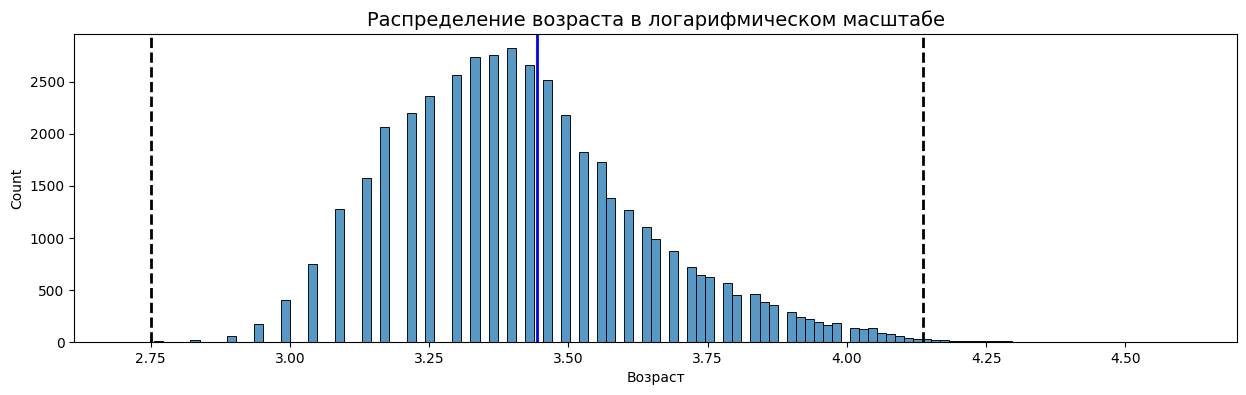

In [55]:
fig     = plt.figure(figsize=(15, 4))
log_age = np.log(hh_base['Возраст'])

histplot = sns.histplot(log_age)
histplot.axvline(log_age.mean(), color='b', lw=2)
histplot.axvline(log_age.mean()+ 3 * log_age.std(), color='k', ls='--', lw=2)
histplot.axvline(log_age.mean()- 3 * log_age.std(), color='k', ls='--', lw=2)
histplot.set_title('Распределение возраста в логарифмическом масштабе', fontsize=14);

# определение направления асимметрии
asymmetry = log_age.skew()
if asymmetry > 0:
    print(f'Распределение имеет правостороннюю асимметрию: {asymmetry}')
else:
    print(f'Распределение имеет левостороннюю асимметрию: {asymmetry}')

Распределение имеет правостороннюю асимметрию.

Сделаем "послабление" на 1 сигму (возьмем 4 сигмы) в правую сторону. В итоге получится всего 3 выброса, два по 15 и один 100 лет. Что на самом деле очень похоже на выбросы и их следует удалить из данных.

In [56]:
# число выбросов с послаблением в одну сигму
outliers, cleaned = outliers_z_score(hh_base, 'Возраст', log_scale=True, left=3, right=4)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

# отображение таблицы с выбросами
display(outliers.sort_values(by='Возраст'))

Число выбросов по методу z-отклонения: 3
Результирующее число записей: 44482


,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,частичная занятость,проектная работа,волонтерство,стажировка,полный день,сменный график,гибкий график,удаленная работа,вахтовый метод,ЗП (руб)
31137,Менеджер по работе с клиентами,"ООО ""ФёрстКэшКомпани""",Менеджер по работе с клиентами,2019-04-06,Не указано,Среднее,М,15,2.0,Санкт-Петербург,...,True,False,False,False,False,True,True,True,False,10000.0
32950,Тестировщик игр,OOO ЖМЫХ,Тестировщик ПО,2019-04-09,Не указано,Среднее специальное,М,15,3.0,другие,...,False,False,False,False,True,False,False,False,False,2000.0
33654,Frontend-разработчик,Freelance,Frontend-разработчик,2019-04-19,Не указано,Среднее специальное,М,100,30.0,Санкт-Петербург,...,True,True,False,True,True,False,True,True,False,60000.0


В таблице приведены три выброса, два по 15 лет с несколькими месяцами опыта и один 100 лет, с всего 30 месяцами работы (два с половиной года), что объективно маловероятно и очень похоже на выбросы, которые могут исказить будущую модель. 

In [57]:
# Удаление обнаруженных выбросов
hh_base = hh_base.drop(outliers.index, axis=0)

# Сохранение датафрейма в csv файл
hh_base.to_csv('data\dst-3.0_16_1_hh_database_cleared.csv', sep=';', index=False)

Данные очищены от выбросов и дубликатов, сформированы новые и удалены ненужные признаки.

[&#8679; к оглавлению](#Оглавление)